[방법 1] 직접 접근 방식 수행시간 : 4500.49 ms
[방법 2] 룩업 테이블 방식 수행시간 : 40.11 ms
[방법 3] Numpy 연산 방식 수행시간 : 8.99 ms
[방법 4] OpenCV 함수 방식 수행시간 : 3.35 ms


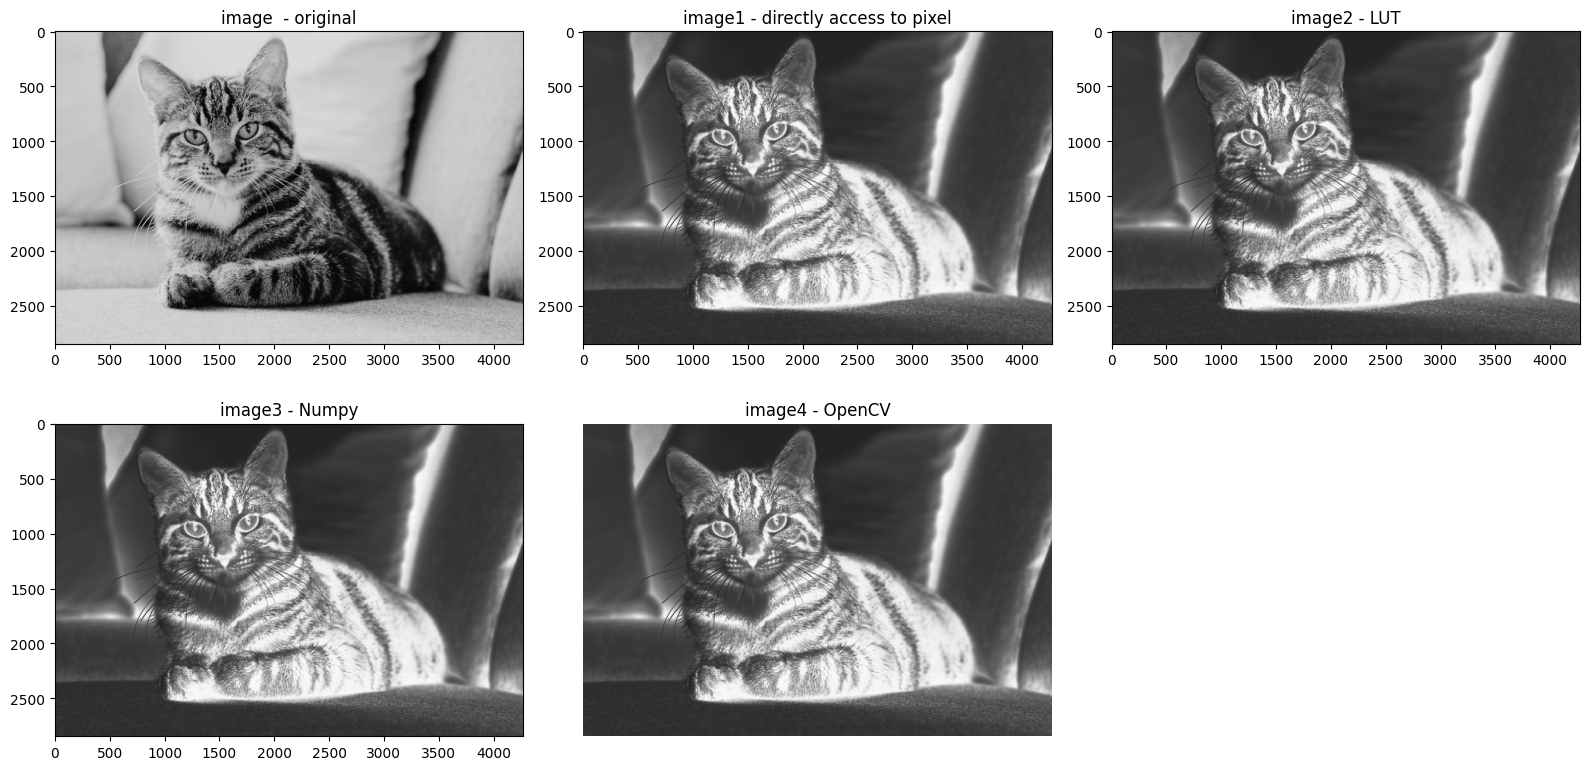

In [3]:
import numpy as np, cv2, time
import matplotlib.pyplot as plt

def pixel_access_1_direct_access(image):
    image1 = np.zeros(image.shape[:2], image.dtype)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel = image[i,j]                  # 화소 접근
            image1[i, j] =  255 - pixel          # 화소 할당
    return image1 

def pixel_access_2_lut(image):
    lut = [255 - i for i in range(256)]  # 룩업테이블 생성
    lut = np.array(lut, np.uint8)
    image3 = lut[image]
    return image3

def pixel_access_3_numpy(image):
    image5 = 255 - image
    return image5

def pixel_access_4_opencv(image):
    image4 = cv2.subtract(255, image)
    return image4

image_org_gray = cv2.imread("example.jpg", cv2.IMREAD_GRAYSCALE) 

# 수행시간 체크
def time_check(func, msg):
    start_time = time.perf_counter()
    ret_img = func( image_org_gray )
    elapsed = (time.perf_counter() - start_time) * 1000
    print(msg, "수행시간 : %.2f ms" % elapsed)
    return ret_img
pass

image_1_direct_access = time_check( pixel_access_1_direct_access, "[방법 1] 직접 접근 방식" )
image_2_lut = time_check( pixel_access_2_lut, "[방법 2] 룩업 테이블 방식" )
image_3_numpy = time_check( pixel_access_3_numpy, "[방법 3] Numpy 연산 방식" )
image_4_opencv = time_check( pixel_access_4_opencv, "[방법 4] OpenCV 함수 방식" )

plt.figure(figsize=(16, 8))

# 원본 이미지 (RGB)
plt.subplot(2, 3, 1)
plt.title('image  - original')
plt.imshow(image_org_gray, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 3, 2)
plt.title('image1 - directly access to pixel')
plt.imshow(image_1_direct_access, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 3, 3)
plt.title('image2 - LUT')
plt.imshow(image_2_lut, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 3, 4)
plt.title('image3 - Numpy' )
plt.imshow(image_3_numpy, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 3, 5)
plt.title('image4 - OpenCV')
plt.imshow(image_4_opencv, cmap='gray', vmin=0, vmax=255)

plt.axis('off')
plt.tight_layout()
plt.show() 